
IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
#for plotting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Machine Learning Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

LOADING DATASET

In [5]:
df=pd.read_csv("../Datasets/DDos.csv")

In [6]:
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
6,54925,4,2,0,12,0,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
8,9282,4,2,0,12,0,6,6,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
9,55153,4,2,0,37,0,31,6,18.5,17.67767,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


DATA PREPROCESSING


In [7]:
#remove the spaces before column names
df.columns=df.columns.str.strip()

#unique values in the label target columns
df.loc[:,'Label'].unique()


array(['BENIGN', 'DDoS', nan], dtype=object)

In [8]:
df.shape

(66237, 79)

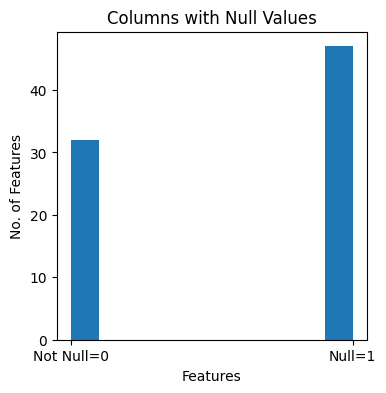

In [9]:
#check the null values  in the dataset
plt.figure(1,figsize=(4,4))
plt.hist(df.isna().sum())
#Set the title and axis labels
plt.xticks([0,1],labels=['Not Null=0','Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Features')
plt.ylabel('No. of Features')

#Show the plot
plt.show()


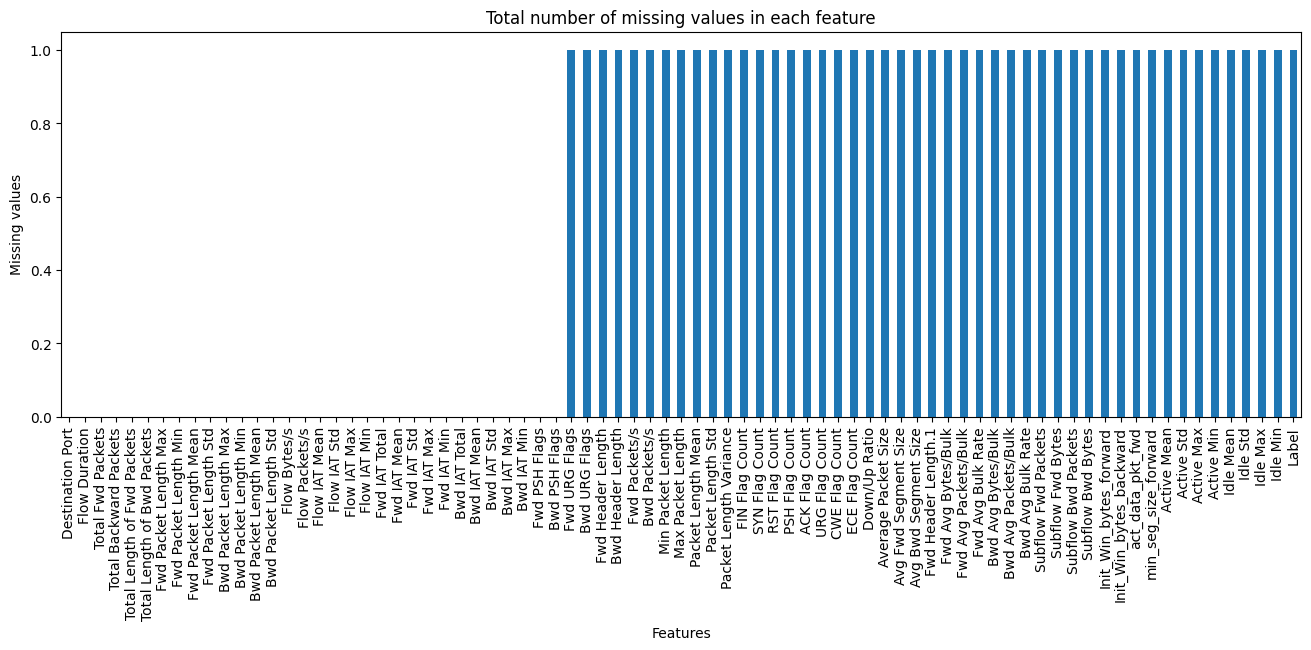

In [10]:
def plotMissingValues(dataframe):
  missing_values=dataframe.isnull().sum()#counting null values for each column
  fig=plt.figure(figsize=(16,5))
  missing_values.plot(kind='bar')
  plt.xlabel("Features")
  plt.ylabel("Missing values")

  plt.title("Total number of missing values in each feature")
  plt.show()


plotMissingValues(df)

In [11]:
df_without_null_values=df.dropna()

In [12]:
df_without_null_values.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

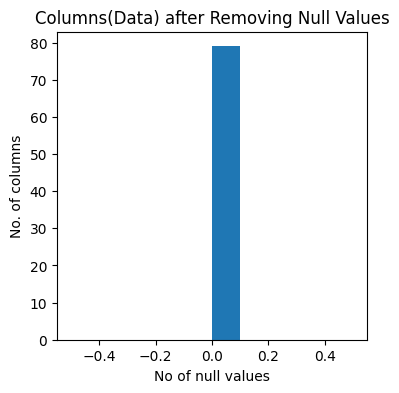

In [13]:
#CHecking null values in dataset AFTER REMOVING NULL VALUES
#checking the null values  in the dataset
plt.figure(1,figsize=(4,4))
plt.hist(df_without_null_values.isna().sum())
#Set the title and axis labels

plt.title('Columns(Data) after Removing Null Values')
plt.xlabel('No of null values')
plt.ylabel('No. of columns')

#Show the plot
plt.show()

In [14]:
pd.set_option('use_inf_as_na',True)#Treat inf as NaN
null_values=df_without_null_values.isnull().sum() #Check for NaN values

#print(null_values)

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_21552\3459607932.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na',True)#Treat inf as NaN


In [15]:
#to know data types of the columns
(df_without_null_values.dtypes=='object')

Destination Port               False
Flow Duration                  False
Total Fwd Packets              False
Total Backward Packets         False
Total Length of Fwd Packets    False
                               ...  
Idle Mean                      False
Idle Std                       False
Idle Max                       False
Idle Min                       False
Label                           True
Length: 79, dtype: bool

In [16]:
#Convert the labels in the DataFrame to numerical values
df_without_null_values['Label']=df_without_null_values['Label'].map({'BENIGN':0,'DDoS':1})

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_21552\3745091818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_null_values['Label']=df_without_null_values['Label'].map({'BENIGN':0,'DDoS':1})


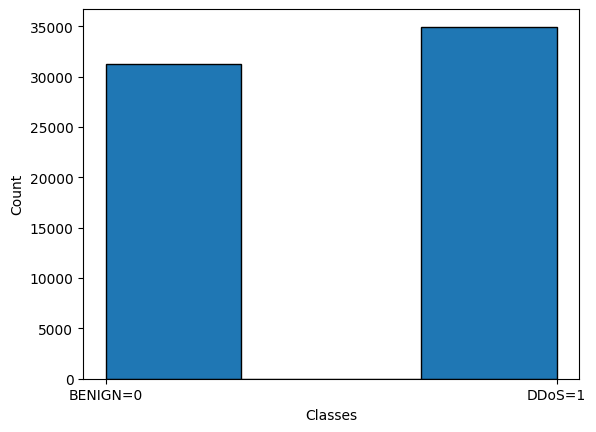

In [17]:
#print the dataframe
plt.hist(df_without_null_values['Label'],bins=[0,0.3,0.7,1],edgecolor='black')
plt.xticks([0,1]  ,labels=['BENIGN=0','DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

as both these classes(benign, ddos)are equal or closely equal..since data is balanced..so we can use accuracy as a metric..

DATA EXPLORATION

In [18]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


In [19]:
df_without_null_values.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,66236.000000,...,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,66236.000000
mean,6454.701794,1.388757e+07,5.180295,5.119225,695.632677,6.716764e+03,351.447068,23.466151,110.716876,135.440531,...,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06,0.527689
std,16711.002247,2.815859e+07,16.873784,23.797303,3230.070242,4.222729e+04,1435.520764,136.609404,400.379518,613.426001,...,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07,0.499237
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,4.995450e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,80.000000,9.949430e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,80.000000,7.640073e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06,1.000000
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


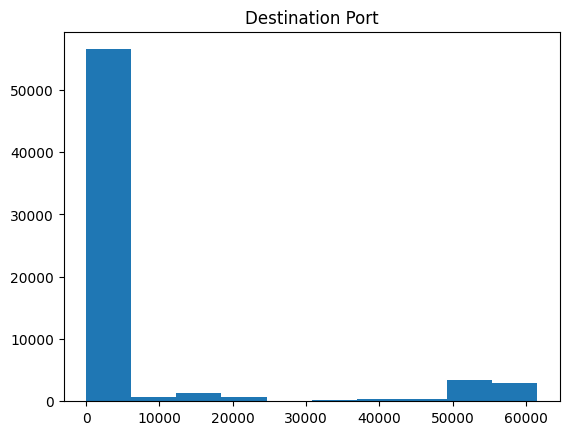

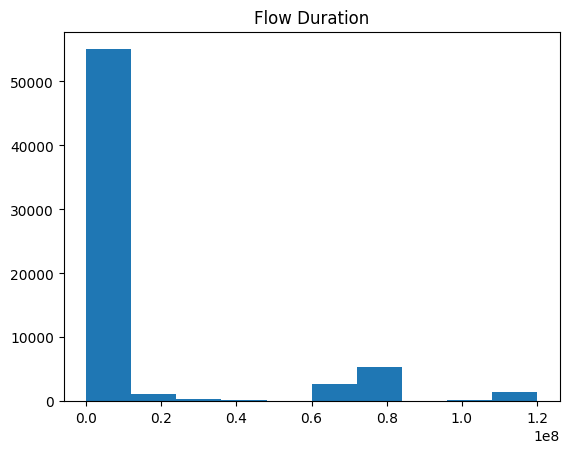

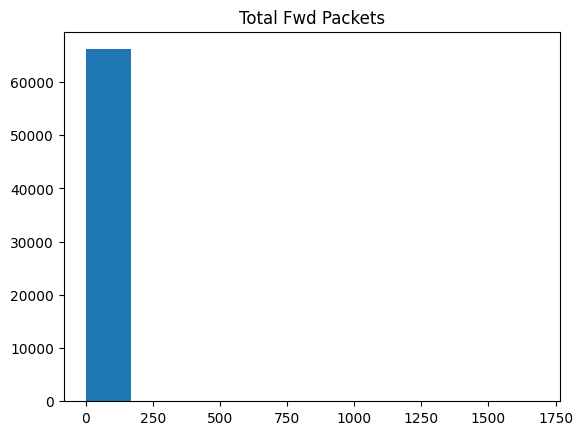

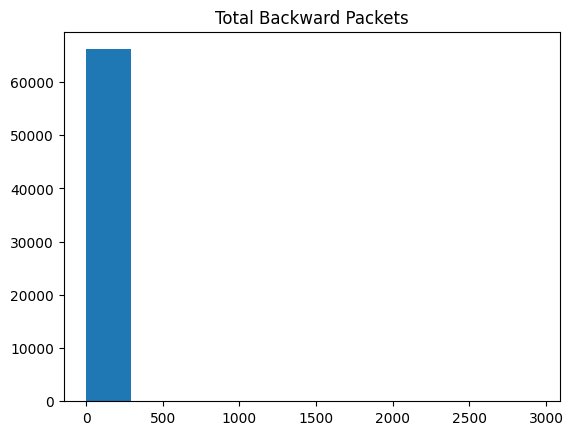

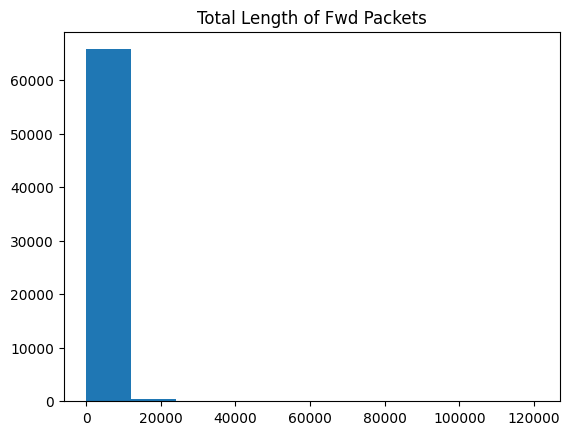

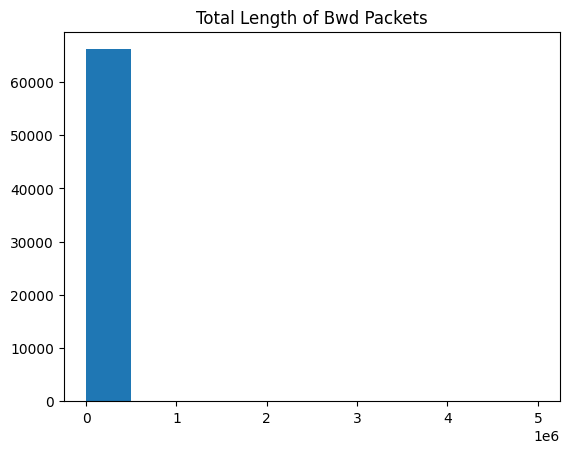

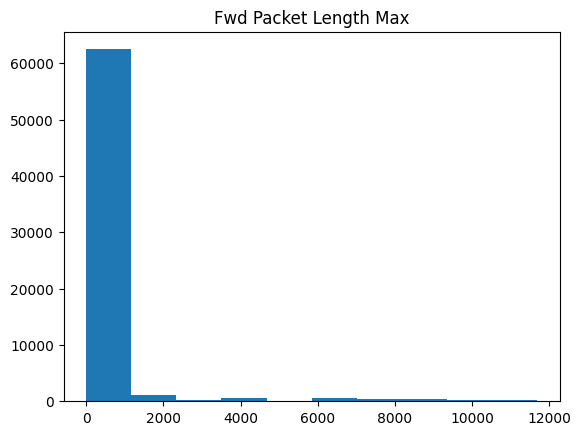

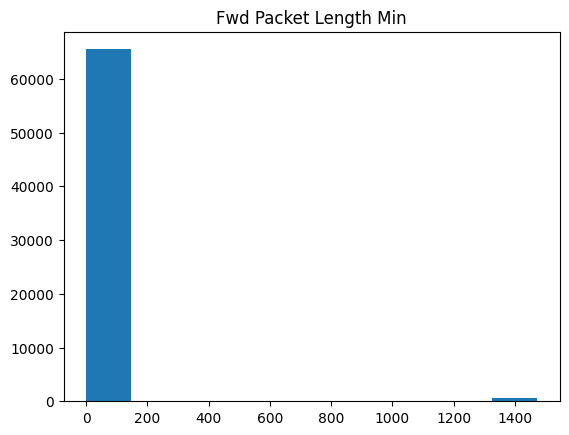

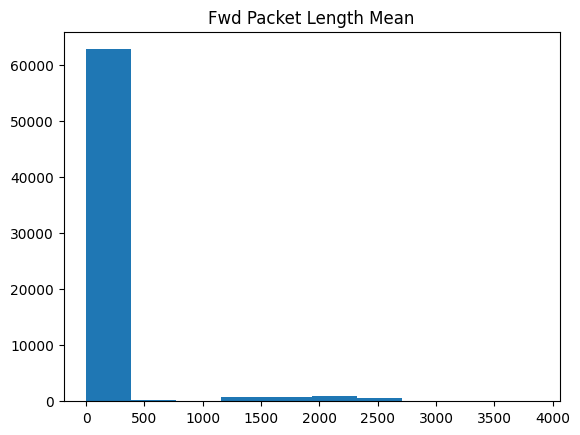

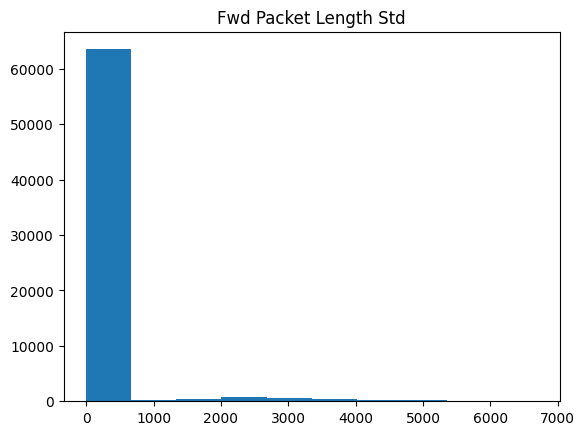

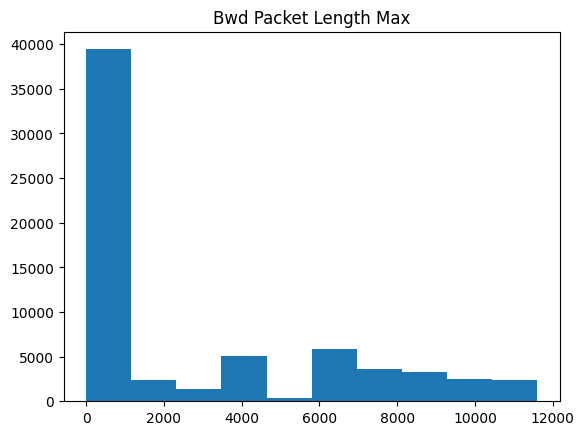

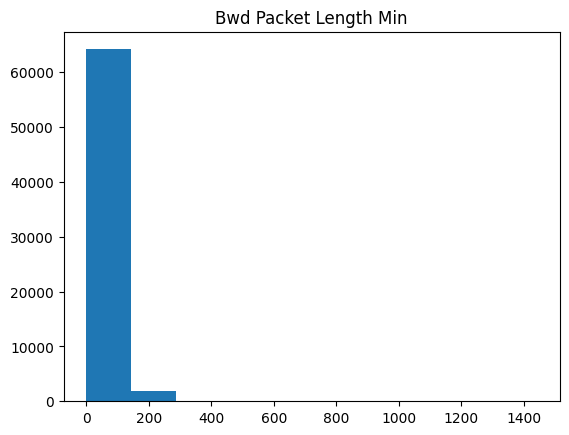

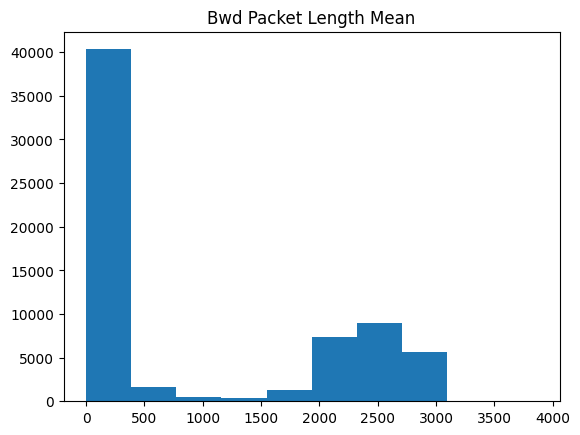

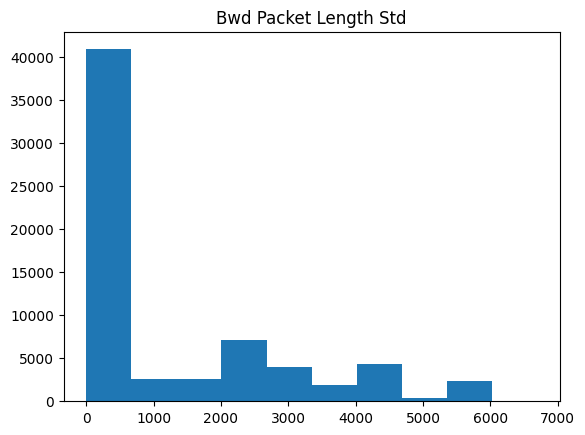

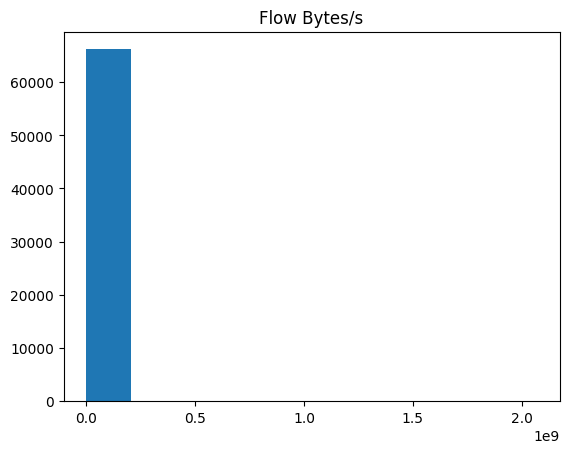

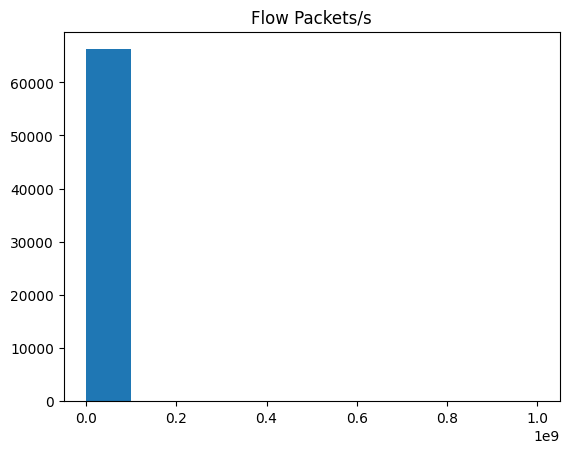

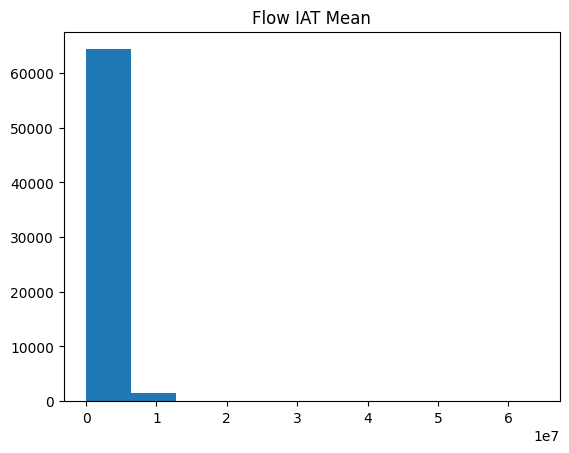

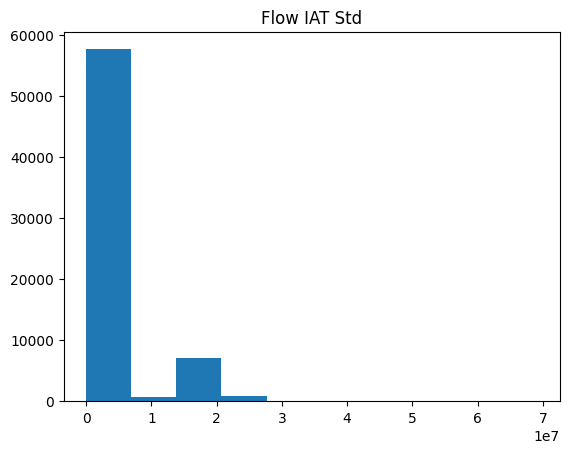

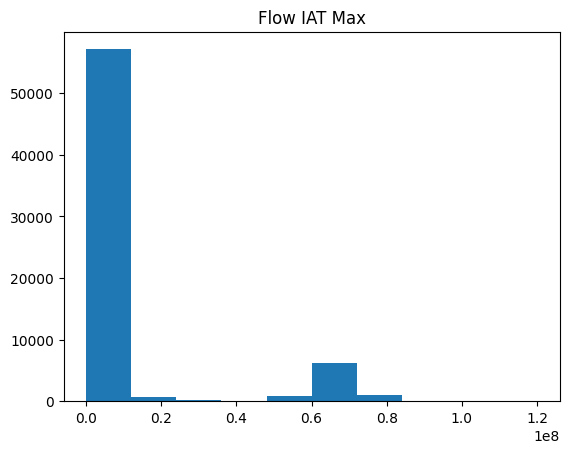

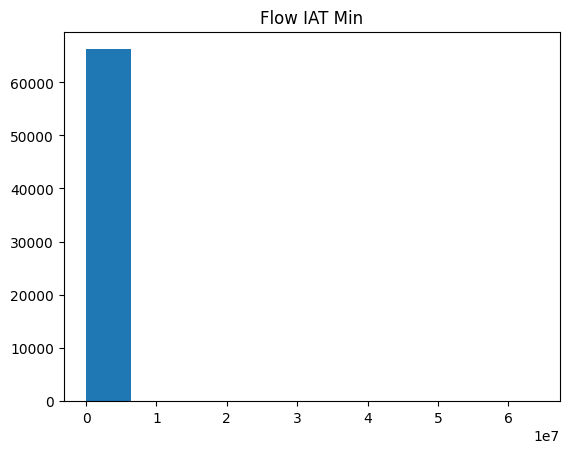

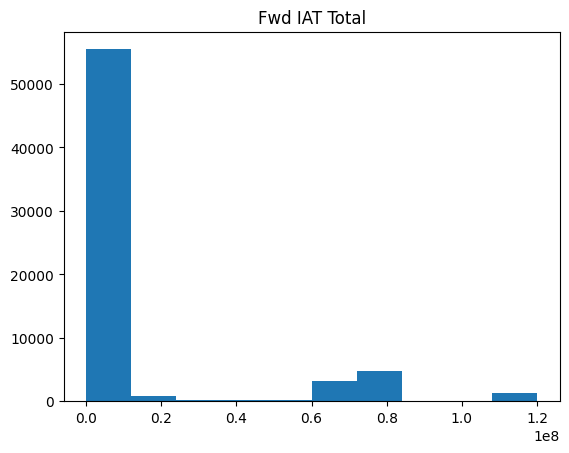

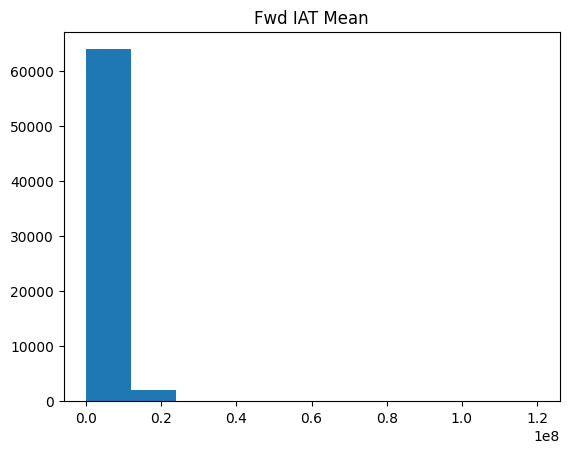

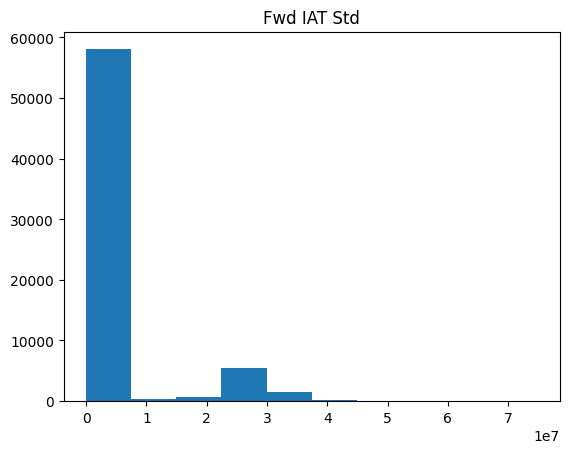

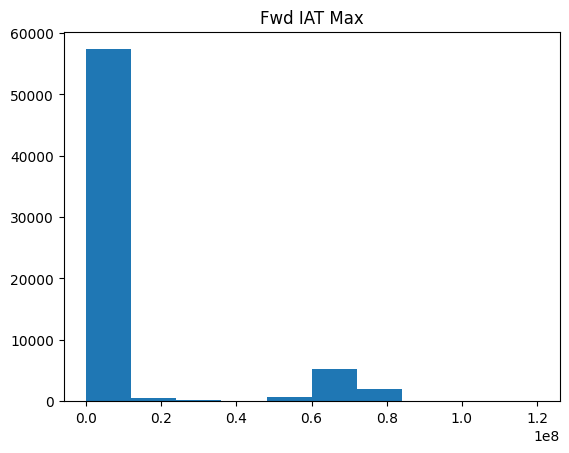

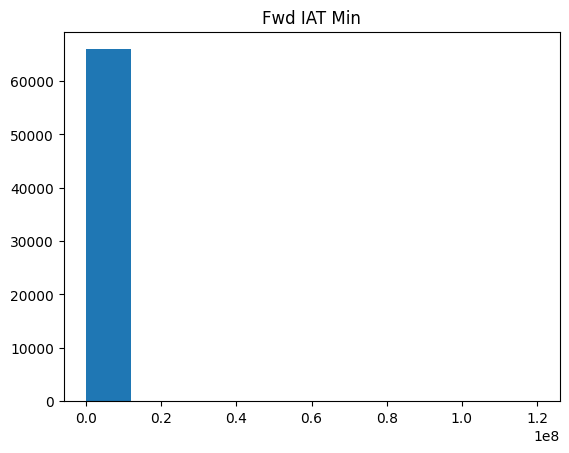

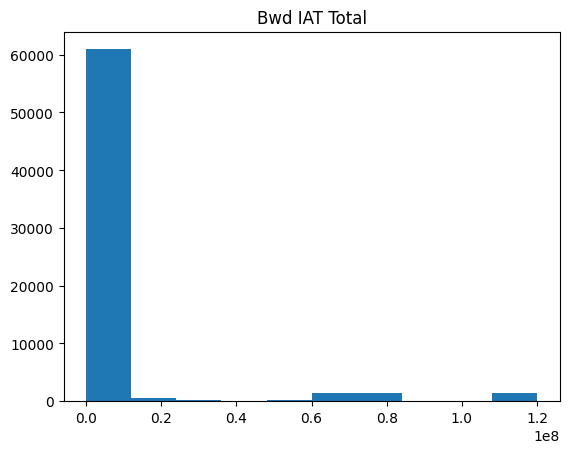

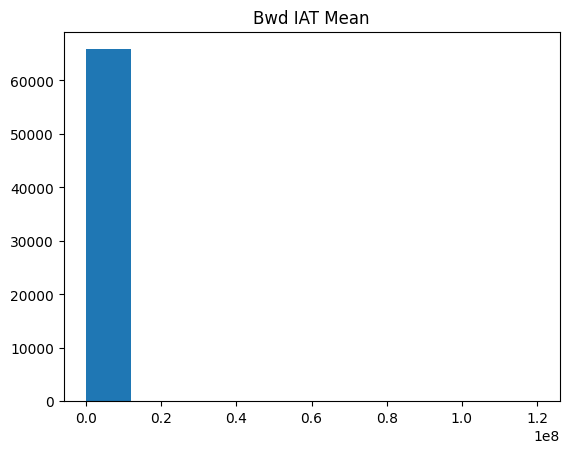

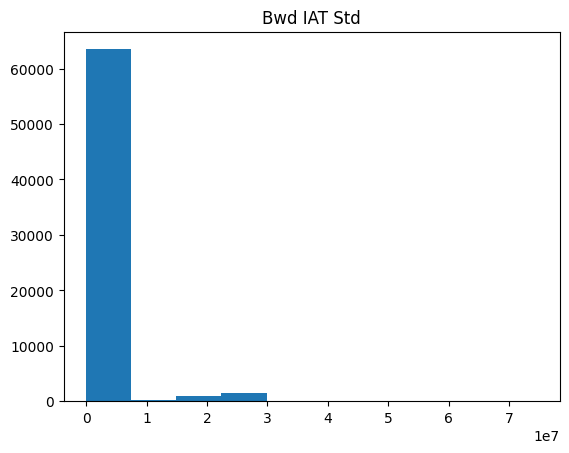

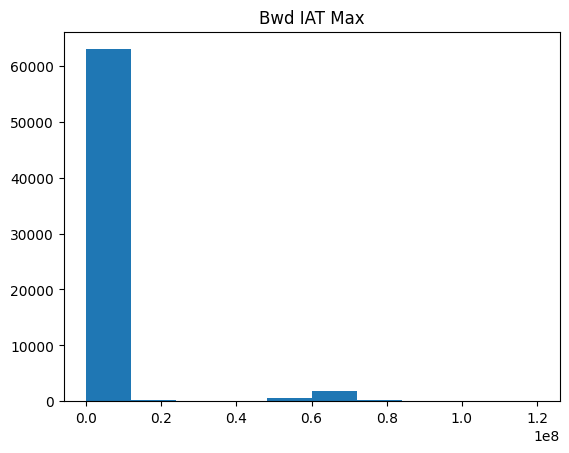

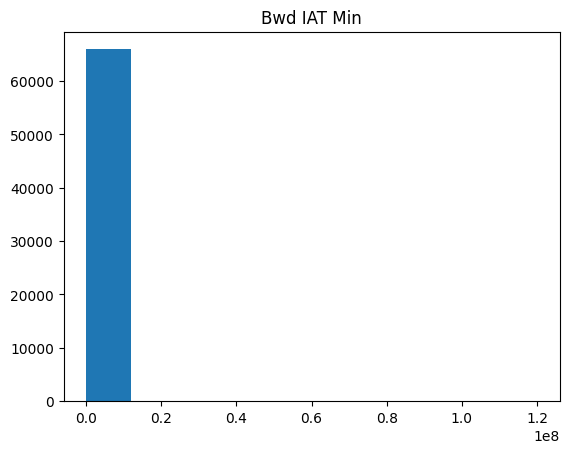

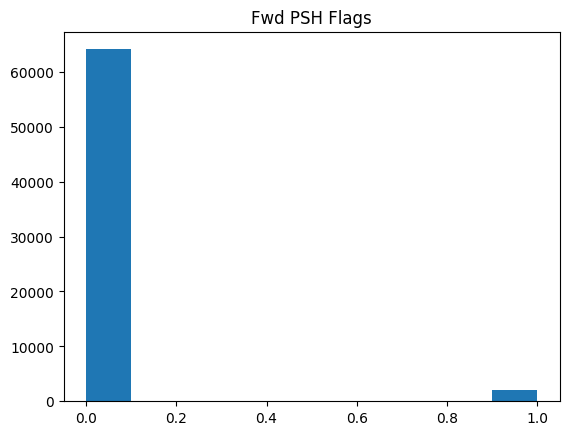

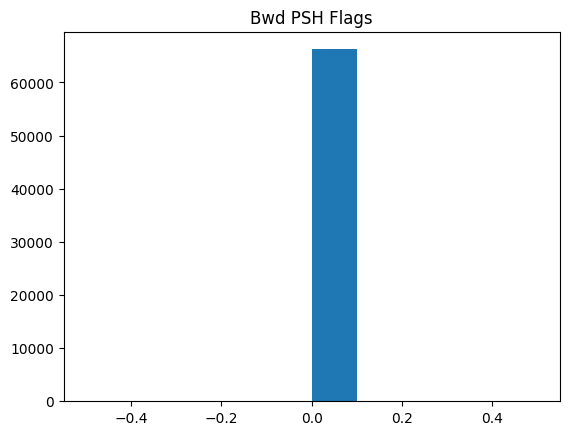

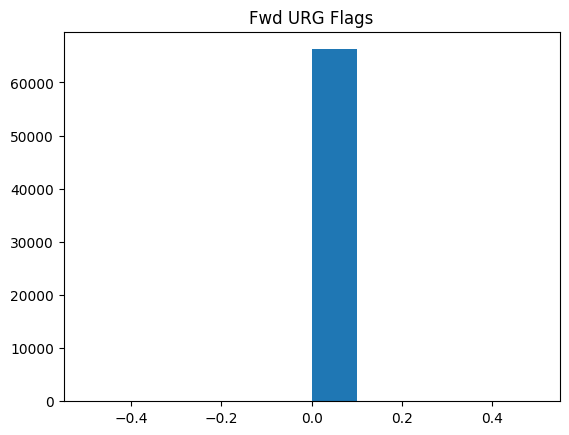

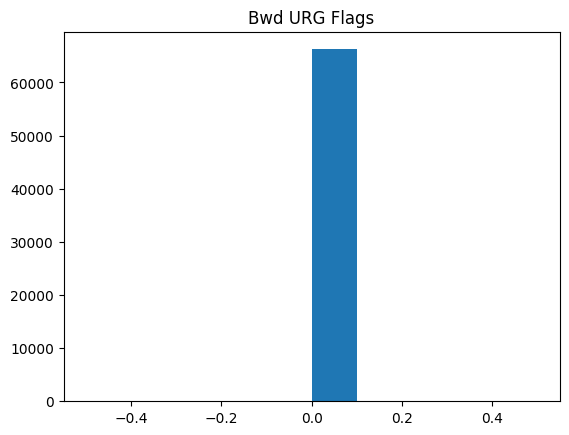

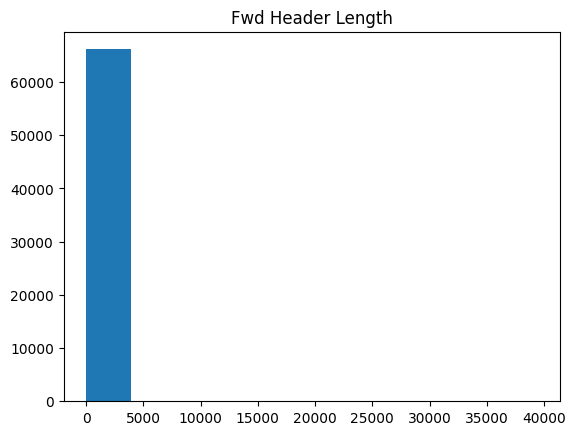

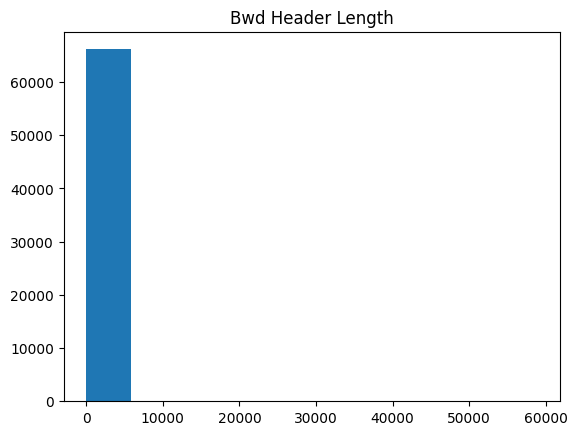

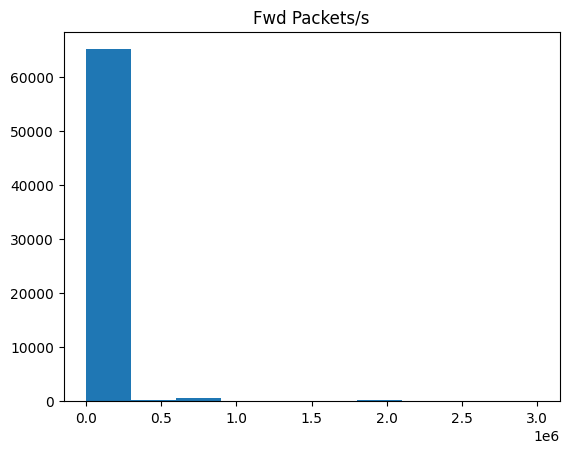

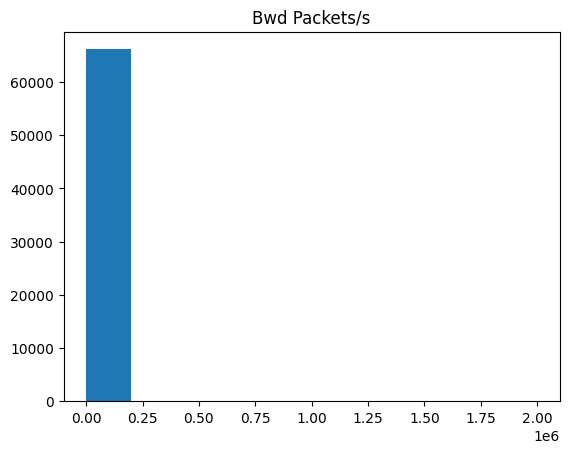

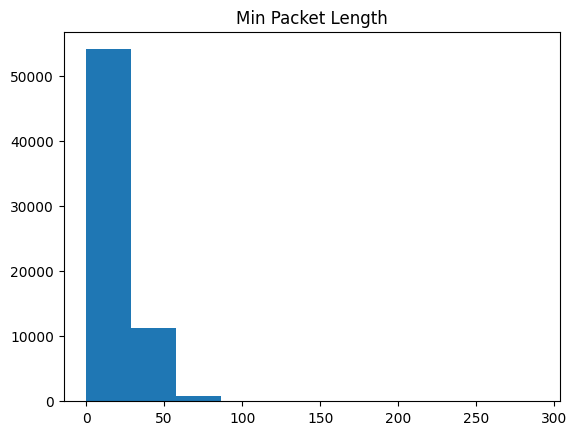

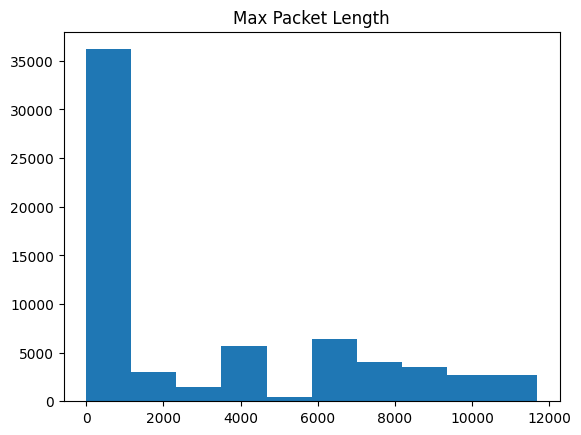

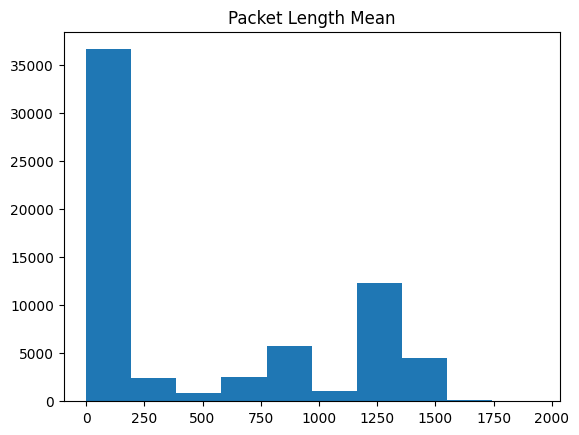

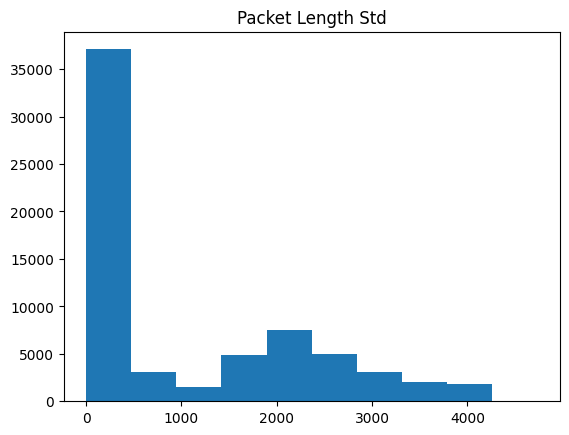

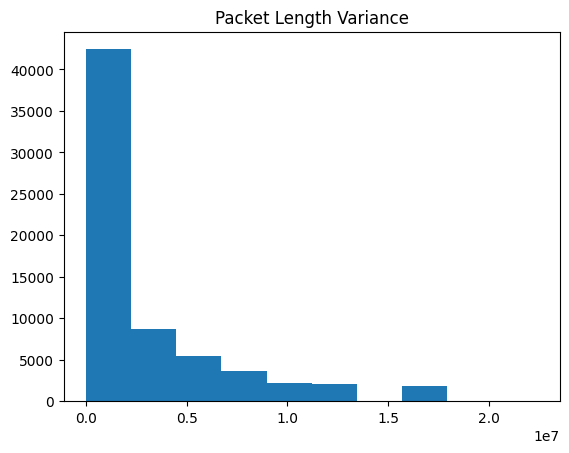

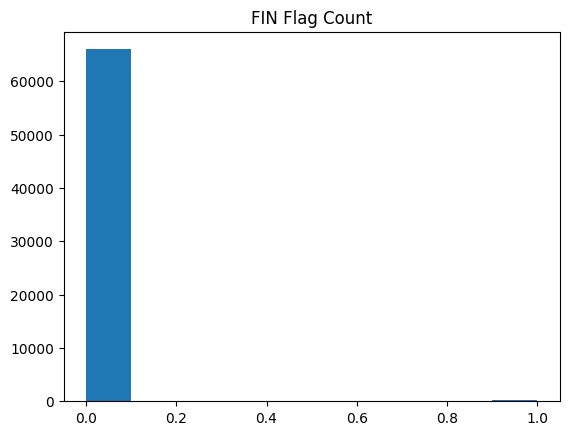

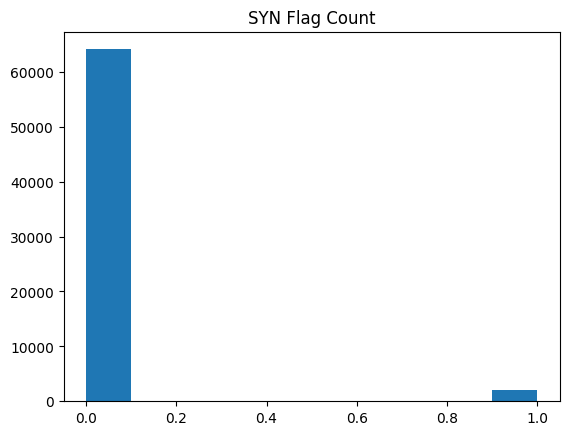

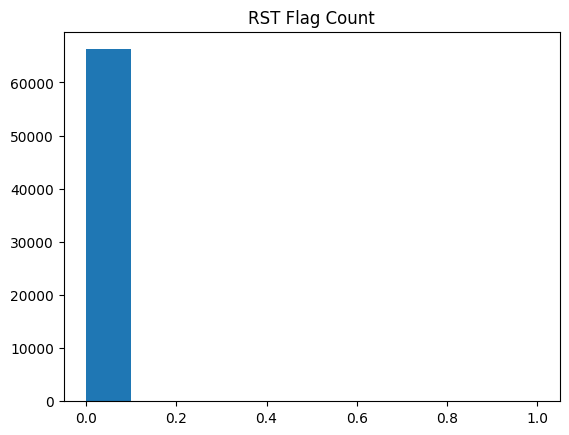

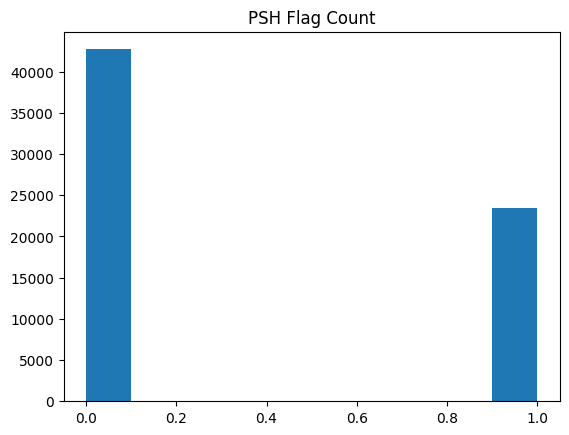

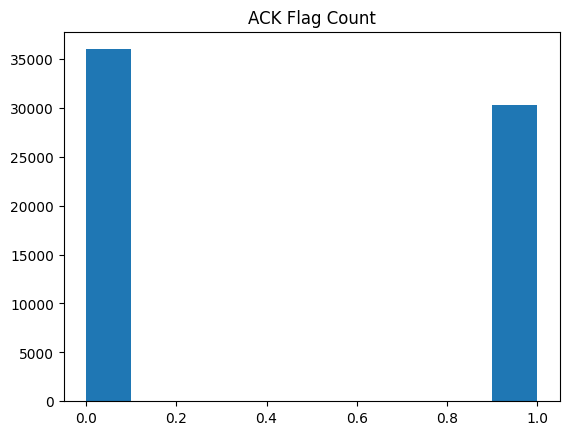

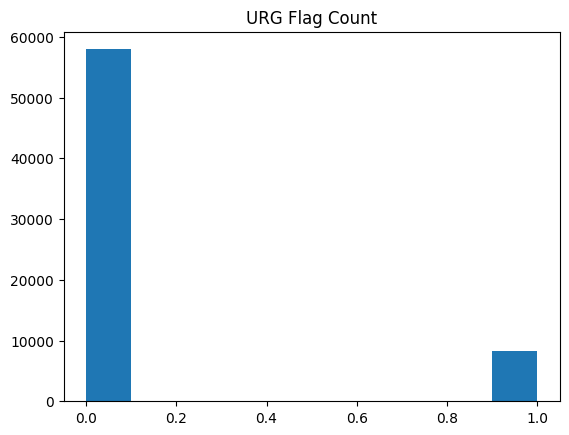

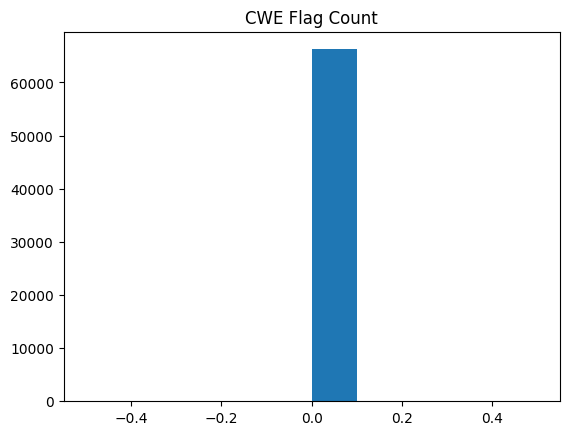

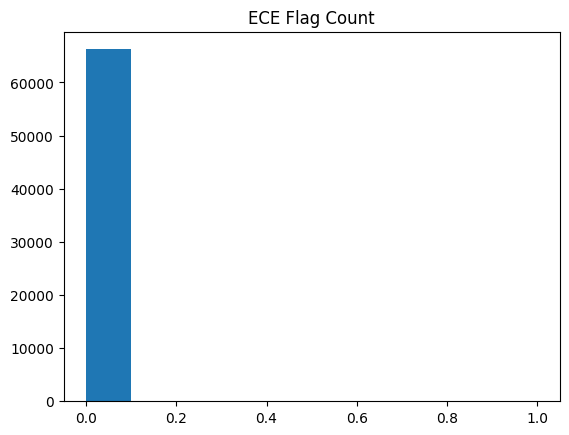

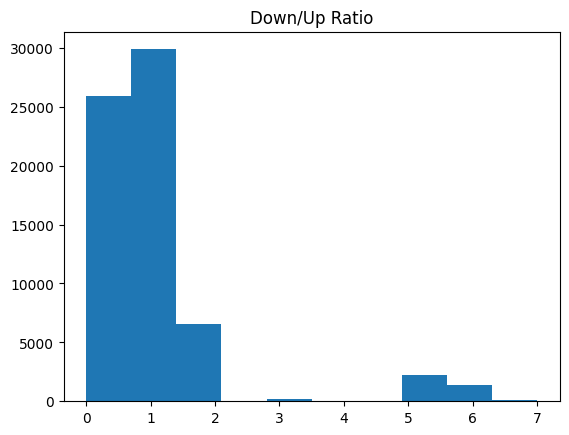

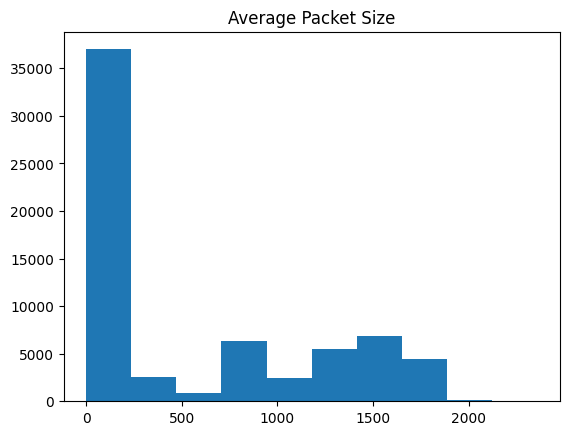

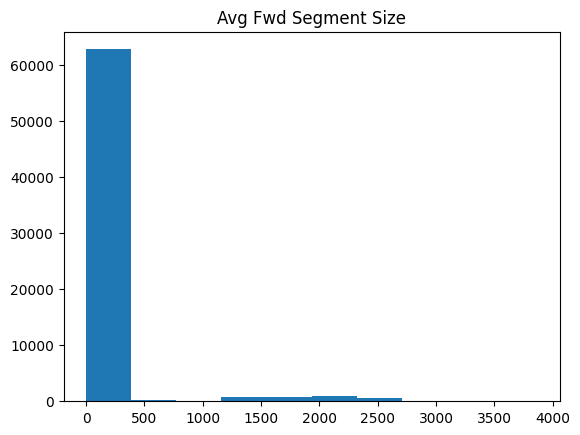

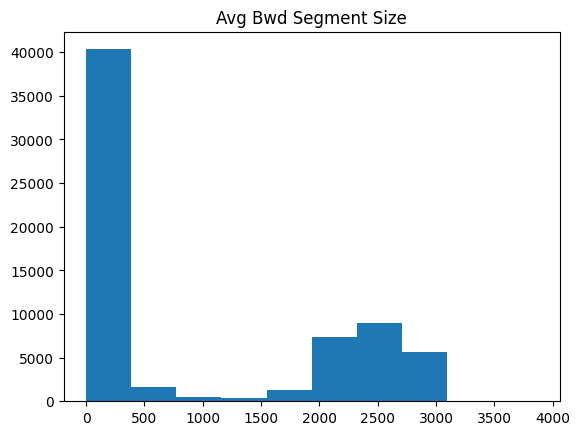

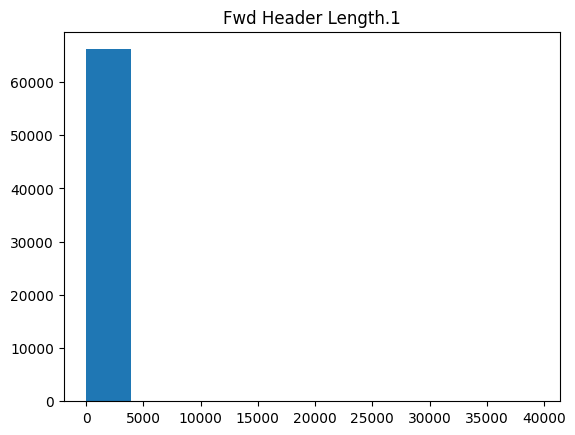

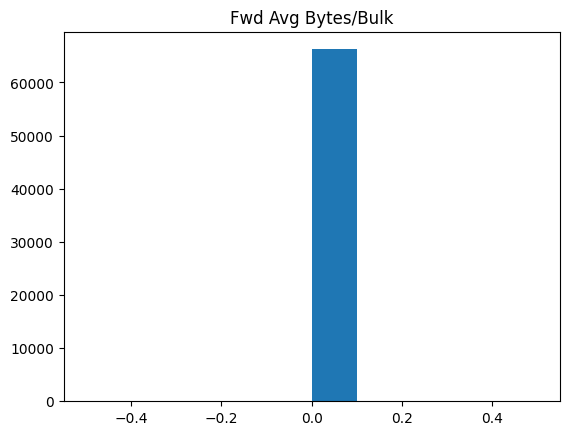

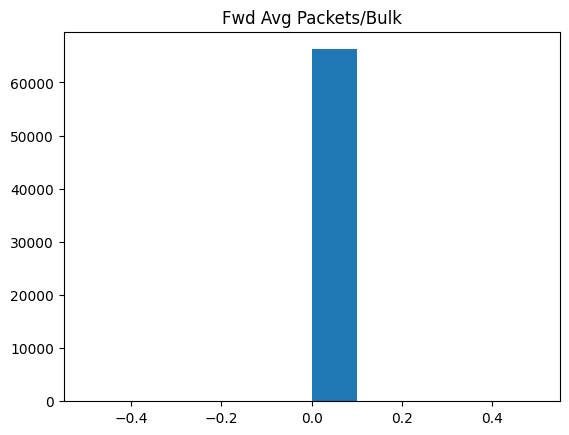

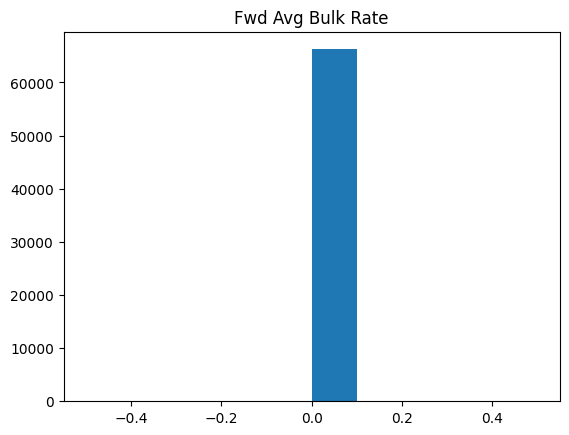

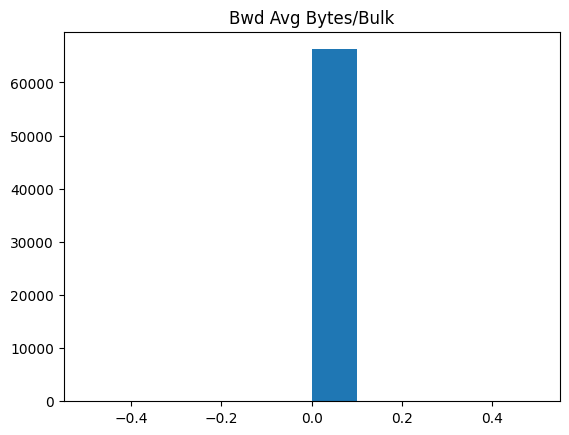

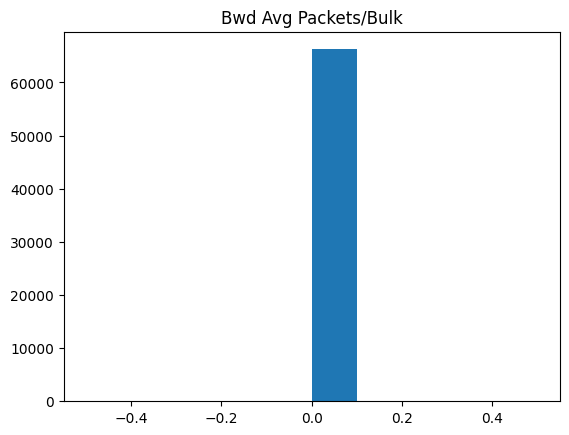

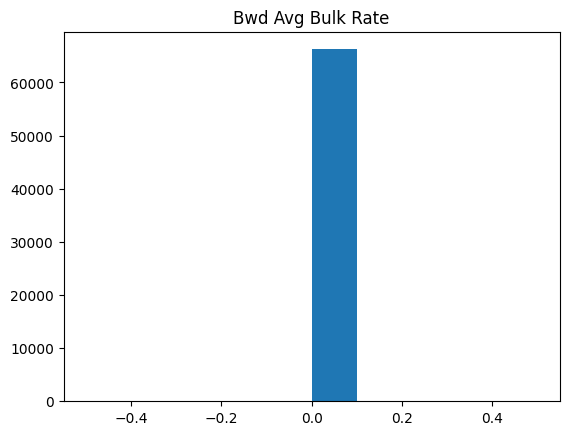

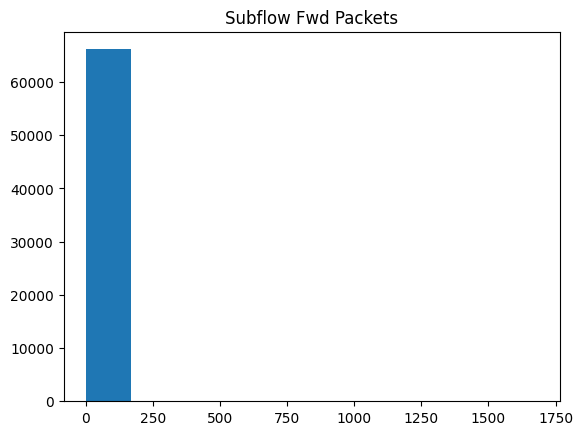

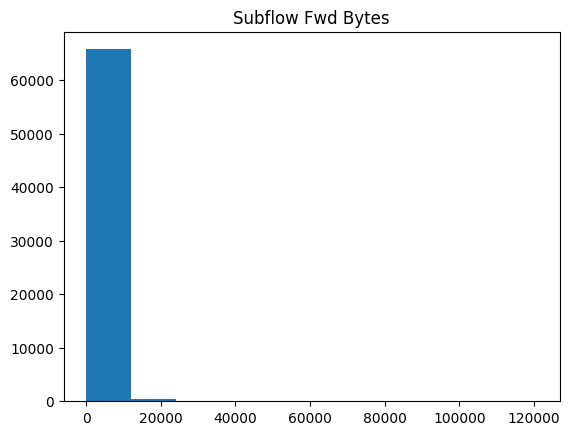

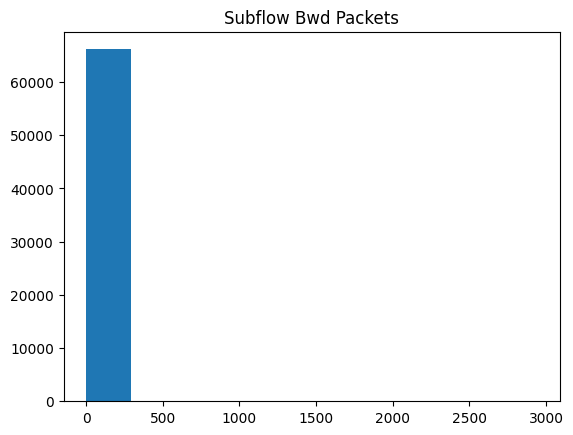

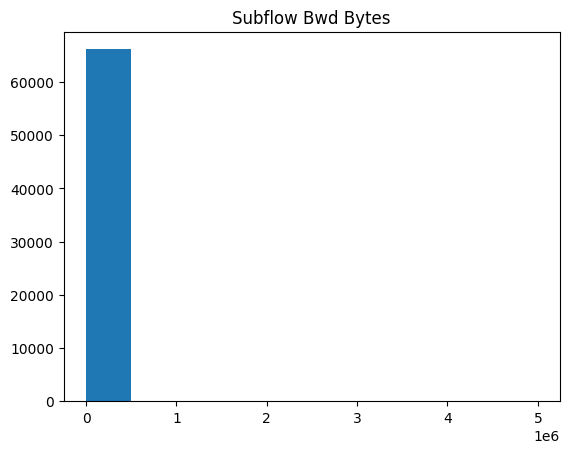

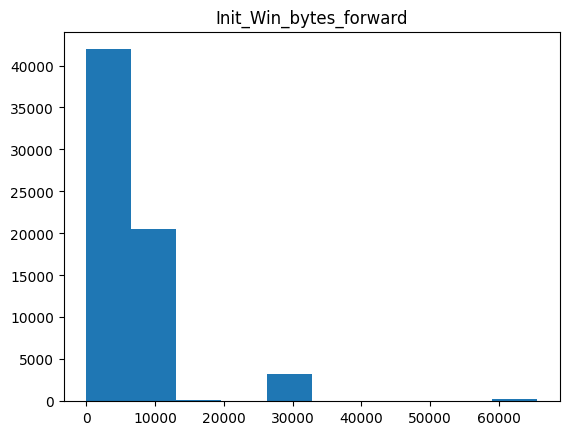

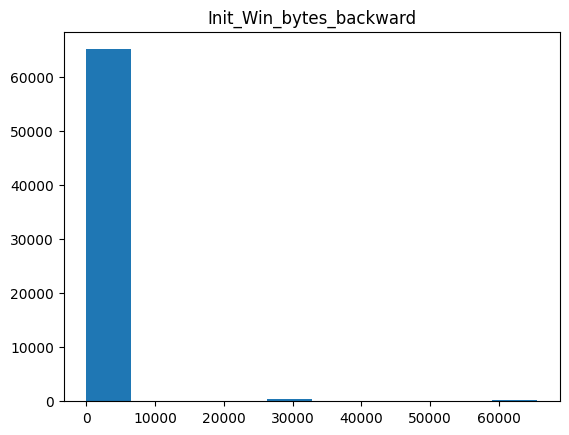

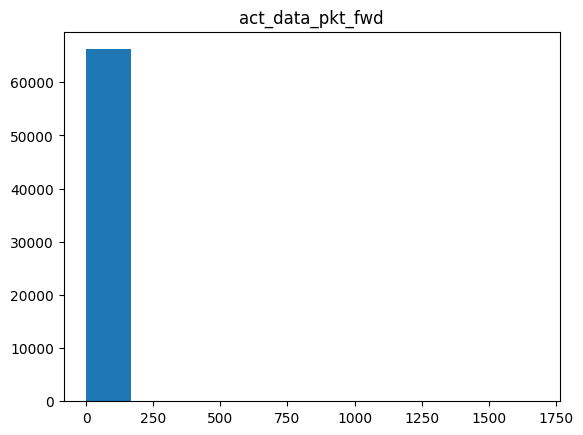

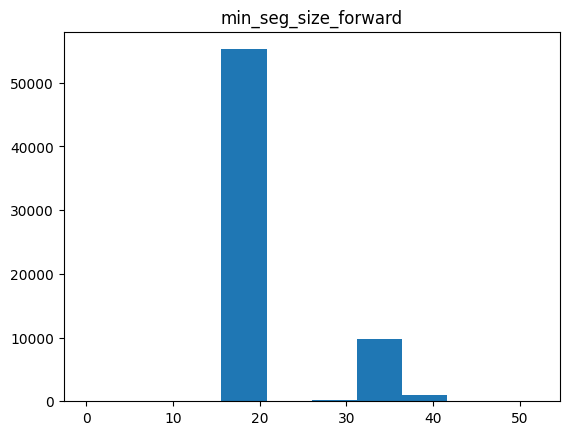

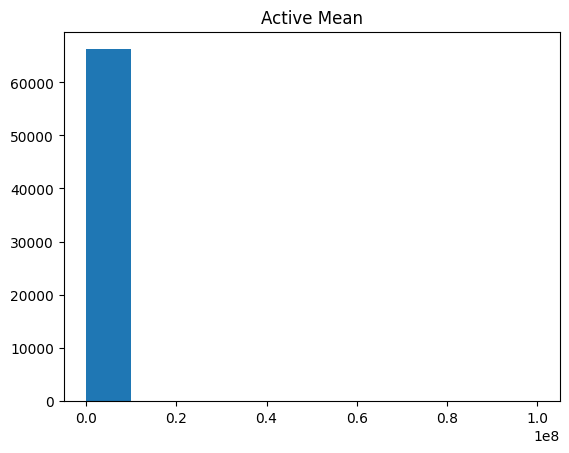

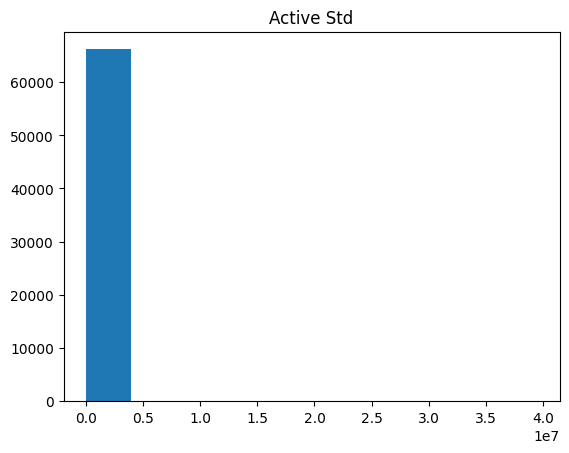

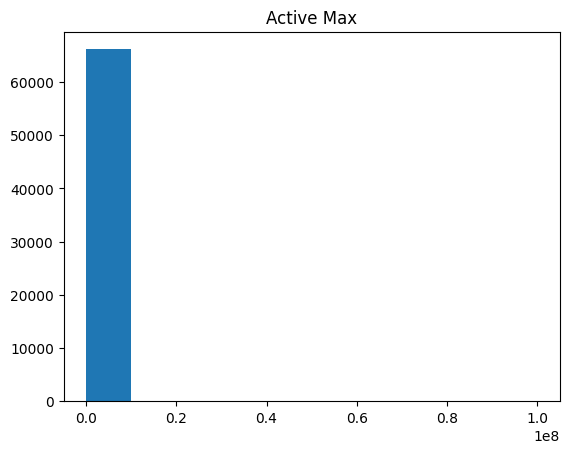

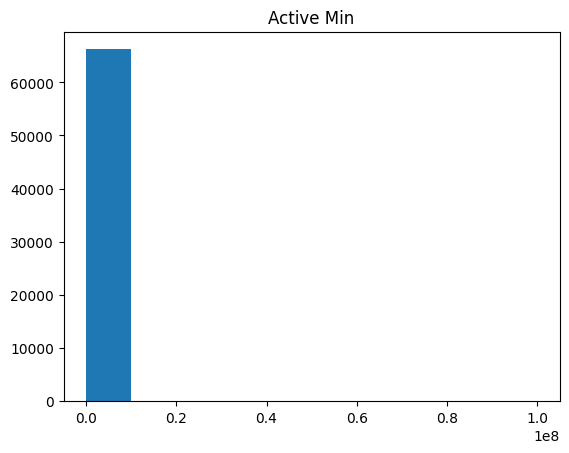

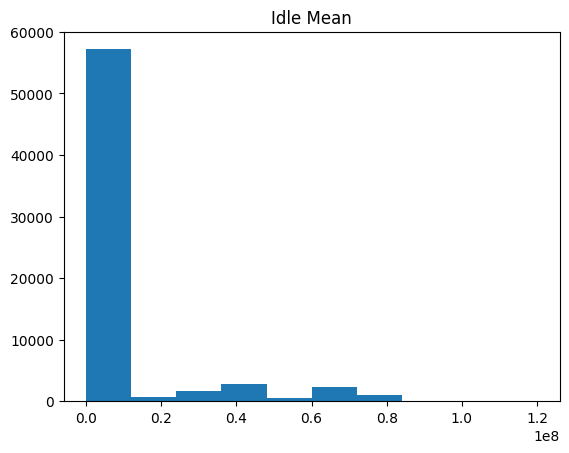

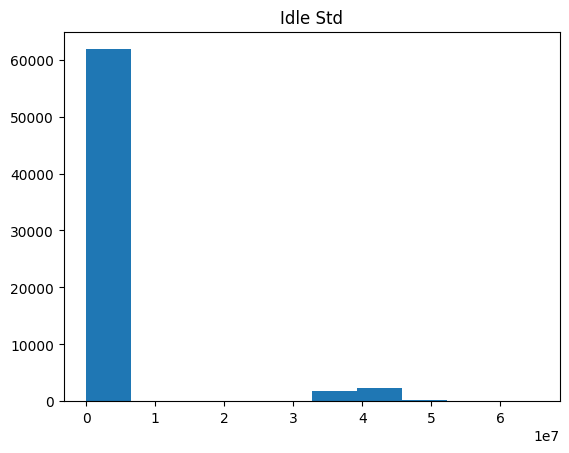

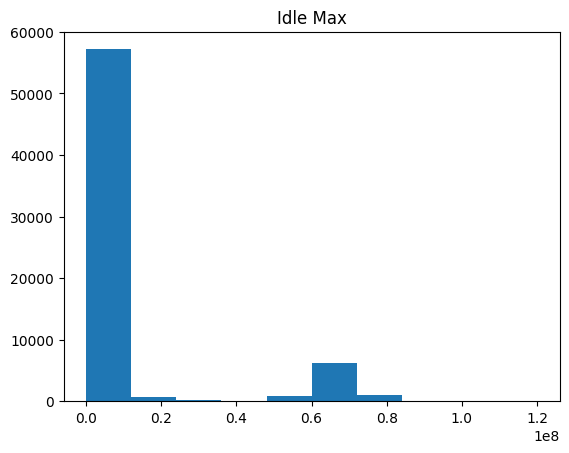

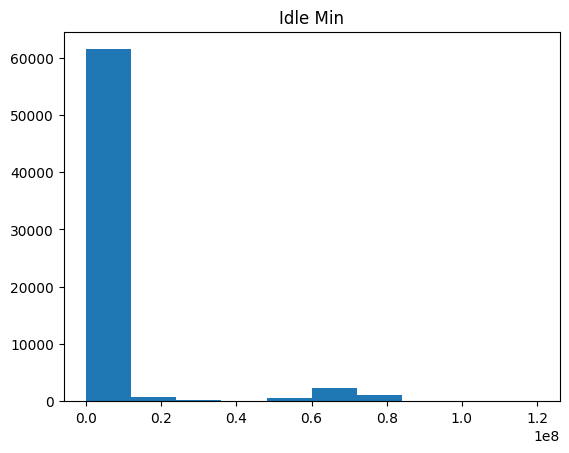

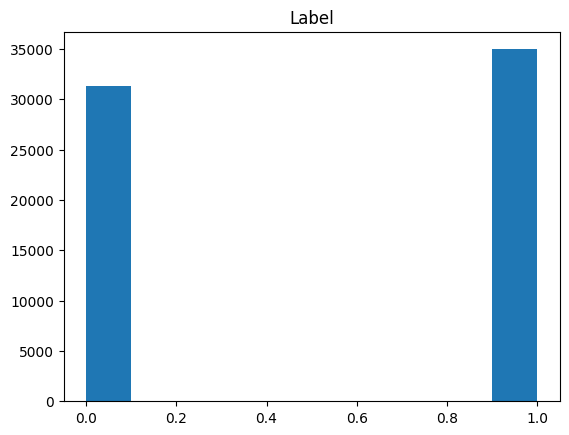

In [20]:
#create a histogram plot for each feature
plt.figure(5)
for col in df_without_null_values.columns:
  plt.hist(df_without_null_values[col])
  plt.title(col)
  plt.show()

Feature Selection:

The dataset has many features. Not all are useful.

Perform EDA: Check correlations (df.corr()), plot distributions for benign vs. attack traffic.

Drop constant features, and features with very high correlation to others.

This step teaches you what features are actually important for detection.

DATA SPLITTING INTO TRAIN AND TEST

In [21]:
#Convert into numpy array

#X1=np.array(df_without_null_values).astype(np.float64)
#y1=np.array(df_without_null_alues['Label'])

--for data of 15 GB or 20 GB .. we need to convert pandas dataframe into numpy array?---bcz numpy arrays are 50% faster than lists--saves computation power

Rule of thumb:
--Use pandas for preprocessing & exploration.
--Convert to NumPy before feeding into ML models (or let scikit-learn handle conversion).
--For 15–20 GB, consider out-of-core processing (Dask, Vaex, or Spark), otherwise your RAM may crash.

In [22]:
#Split data into features and target variables

X=df_without_null_values.drop(columns=['Label'],axis=1) #input cols #axis=1 means column
y=df_without_null_values['Label']#target column

#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)  #random state define the seed no. #(stratify=y)dont know its purpose yet

In [23]:
print("The train dataset size= ", X_train.shape)
print("The test dataset size= ", X_test.shape)

The train dataset size=  (46365, 78)
The test dataset size=  (19871, 78)


Split your data before any scaling to avoid data leakage.
................
Scale Features:

Algorithms like SVMs and Neural Networks are sensitive to feature scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) <-- This is a key MLOps concept: fit on train, transform on test.



# Add scaling to your preprocessing

In [24]:

# Add scaling to your preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data only
X_test_scaled = scaler.transform(X_test)        # Transform test data using same scaling

...........TRAINING THE MODEL...............

RANDOM FOREST

In [25]:
#RANDOM FOREST
rf_model=RandomForestClassifier(n_estimators=50,random_state=42)
rf_model.fit(X_train_scaled,y_train)
rf_pred=rf_model.predict(X_test_scaled)


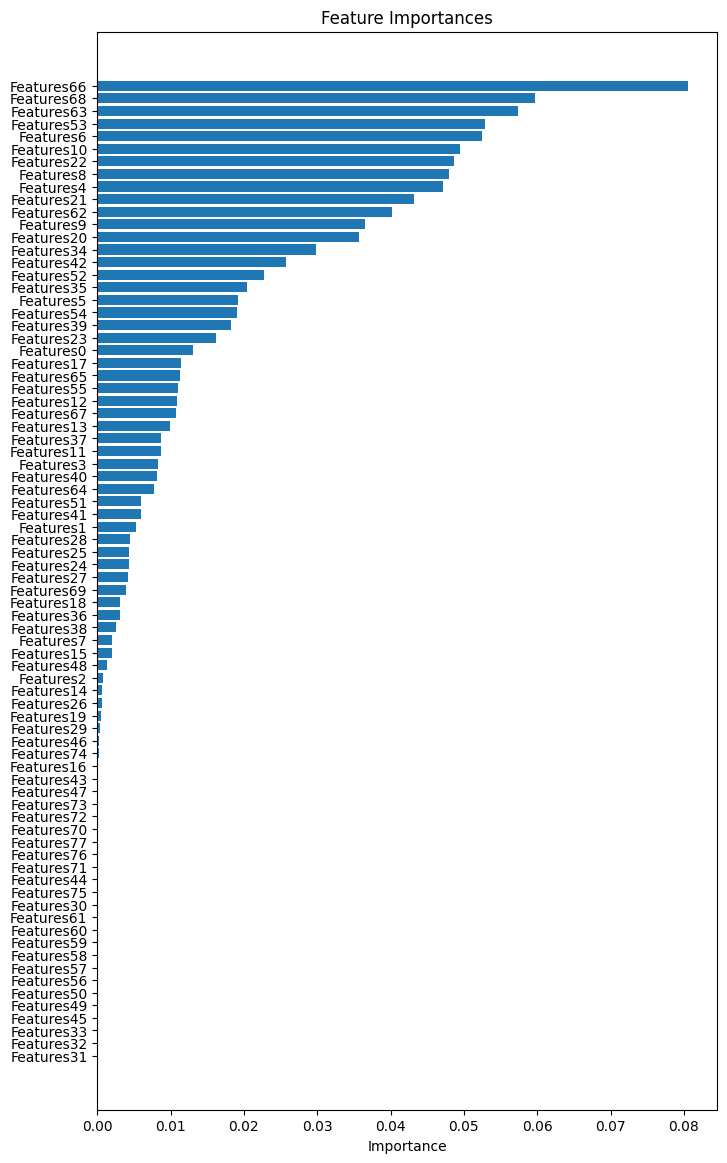

In [26]:
#Getting feature importances from the trained model
importances=rf_model.feature_importances_

#Getting the indices of features sorted by importance
indices=sorted(range(len(importances)),key=lambda i:importances[i],reverse=False)
feature_names=[f"Features{i}" for i in indices]#Replace with your column names

#Plotting feature importances horizontally
plt.figure(figsize=(8,14))

plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

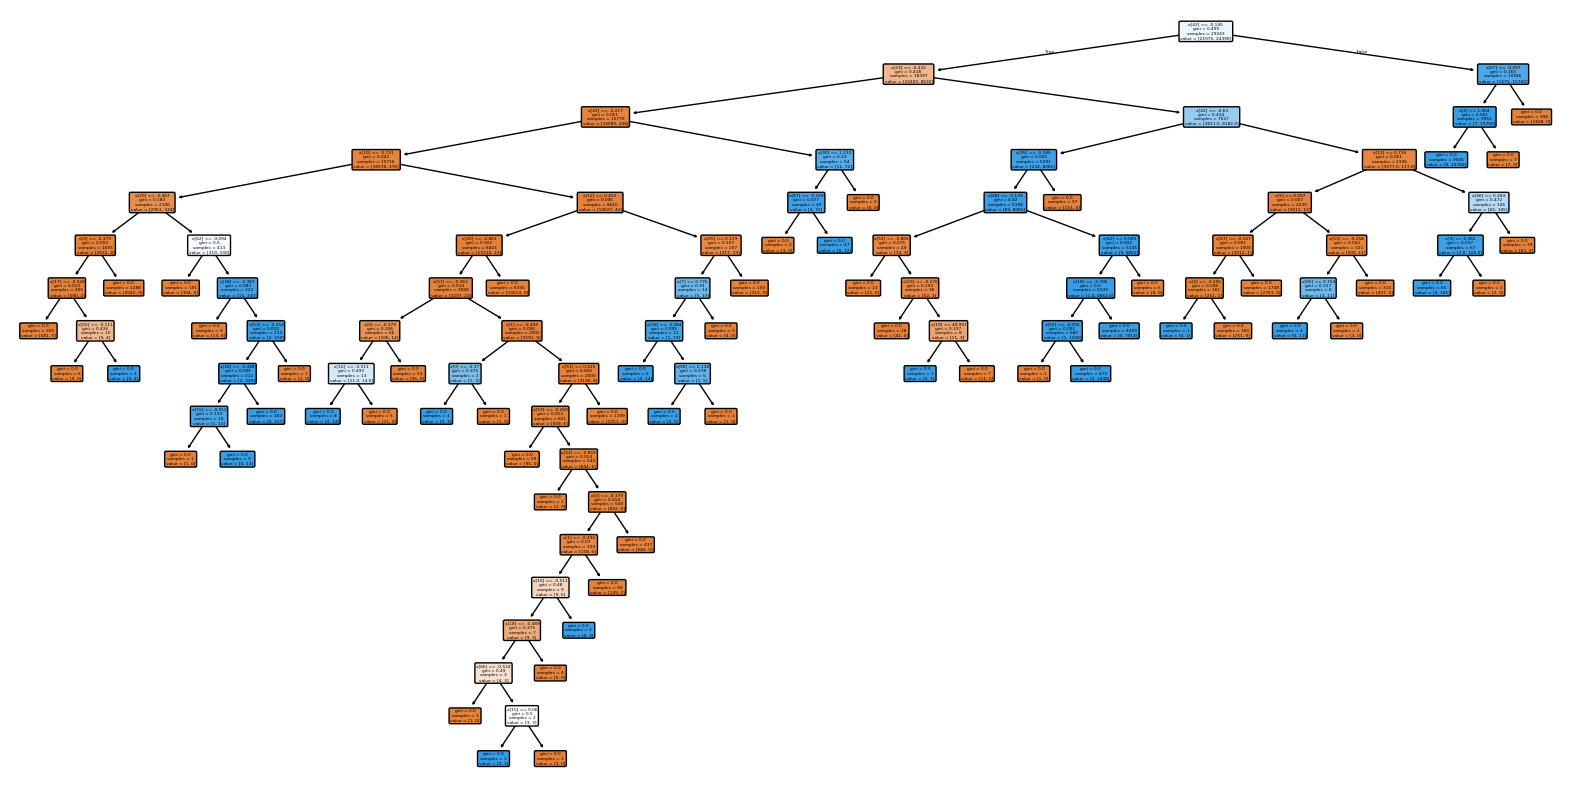

In [27]:


from sklearn.tree import plot_tree
estimator=rf_model.estimators_[0] #SElecting the first estimator from the 

plt.figure(figsize=(20,10))
plot_tree(estimator,filled=True,rounded=True)
plt.show()

MODEL EVALUATION

In [28]:
#FUNCTION TO GENERATE AND DISPLAY A DETAILED CONFUSION MATRIX
def plot_confusion_matrix(y_true,y_pred,classes,title):
  cm=confusion_matrix(y_true,y_pred)
  plt.figure(figsize=(8,6))
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=classes,yticklabels=classes)
  plt.title(title)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.show()
  

In [29]:
# Evaluate Random Forest
rf_accuracy= accuracy_score(y_test,rf_pred)
rf_f1=f1_score(y_test,rf_pred)
rf_precision=precision_score(y_test,rf_pred)
rf_recall=recall_score(y_test,rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy: .4f}')
print(f'F1 Score: {rf_f1: .4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')



Random Forest Metrics:
Accuracy:  0.9995
F1 Score:  0.9995
Precision: 1.0000
Recall: 0.9990


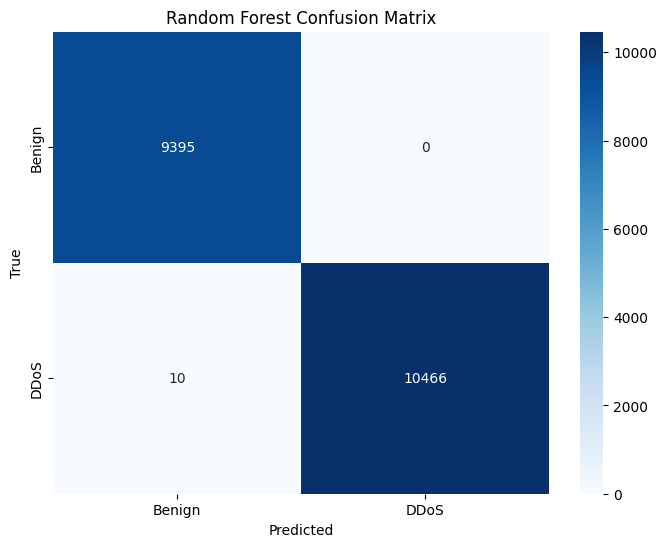

In [30]:
# Plot Confusion Matrix for Random Forest
plot_confusion_matrix(y_test,rf_pred,['Benign','DDoS'],'Random Forest Confusion Matrix')

In [31]:
df_without_null_values.shape
print(y_test.shape)
print(y_test.value_counts())

(19871,)
Label
1    10476
0     9395
Name: count, dtype: int64


LOGISTIC REGRESSION

In [32]:
lr_model=LogisticRegression(random_state=42)
lr_model=lr_model.fit(X_train_scaled,y_train)
lr_pred=lr_model.predict(X_test_scaled)

In [33]:
lr_accuracy= accuracy_score(y_test,lr_pred)
lr_f1=f1_score(y_test,lr_pred)
lr_precision=precision_score(y_test,lr_pred)
lr_recall=recall_score(y_test,lr_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy: .4f}')
print(f'F1 Score: {lr_f1: .4f}')
print(f'Precision: {lr_precision: .4f}')
print(f'Recall: {lr_recall: .4f}')



Logistic Regression Metrics:
Accuracy:  0.9977
F1 Score:  0.9979
Precision:  0.9970
Recall:  0.9987


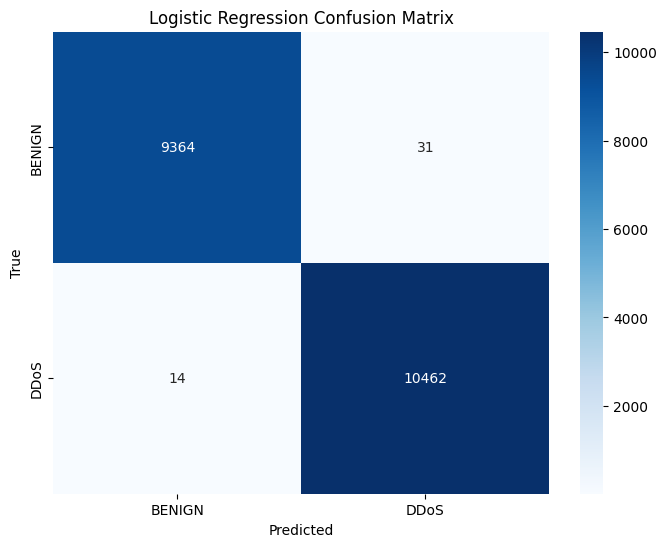

In [34]:
plot_confusion_matrix(y_test,lr_pred,['BENIGN','DDoS'],'Logistic Regression Confusion Matrix')

In [35]:
print(y_test.shape)
print(y_test.value_counts())

(19871,)
Label
1    10476
0     9395
Name: count, dtype: int64


NEURAL NETWORK

In [36]:
nn_model=MLPClassifier(hidden_layer_sizes=(100,50),max_iter=300,random_state=42)
nn_model.fit(X_train_scaled,y_train)
nn_pred=nn_model.predict(X_test_scaled)

In [37]:
nn_accuracy= accuracy_score(y_test,nn_pred)
nn_f1=f1_score(y_test,nn_pred)
nn_precision=precision_score(y_test,nn_pred)
nn_recall=recall_score(y_test,nn_pred)


print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')



Neural Network Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


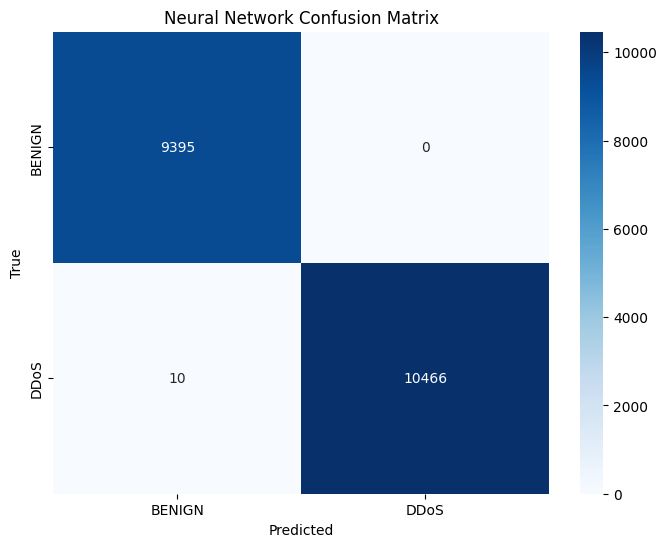

In [38]:
#Confusion Matrix for Neural Network
plot_confusion_matrix(y_test,nn_pred,['BENIGN','DDoS'],'Neural Network Confusion Matrix')

In [39]:
print(y_test.shape)
print(y_test.value_counts())

(19871,)
Label
1    10476
0     9395
Name: count, dtype: int64


MODEL COMPARISON

In [40]:
# Random Forest
rf_proba=rf_model.predict_proba(X_test_scaled)

# Logistic Regression
lr_proba=lr_model.predict_proba(X_test_scaled)

# Neural Network
nn_proba= nn_model.predict_proba(X_test_scaled)

#it tells the probabilities of zeros or ones(predict_proba function)

tpr= TRUE POSTIVE RATE...same as Recall (Of all actual positives, how many did we correctly predict?)
 (Recall (TPR)  = TP / (TP+FN))
 ...........................................................
fpr= FALSE POSTIVE RATE 
proportion of negatives incorrectly classified as positives.
( FPR = FP / (FP+TN))
..............................................................
Precision → Not FPR/TPR (it’s separate).
Recall = TPR
FPR = something else (used in ROC curve).


ROC-- the more area under the curve means the better the algorithm is

In [41]:
#Combine predictions for ROC curve

# Calculate ROC curve for Random Forest
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_proba[:,1])
rf_auc= auc(rf_fpr,rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_proba[:,1])
lr_auc=auc(lr_fpr,lr_tpr)

# Calculate ROC curve for Neural Network
nn_fpr,nn_tpr,_=roc_curve(y_test,nn_proba[:,1])
nn_auc=auc(nn_fpr,nn_tpr)

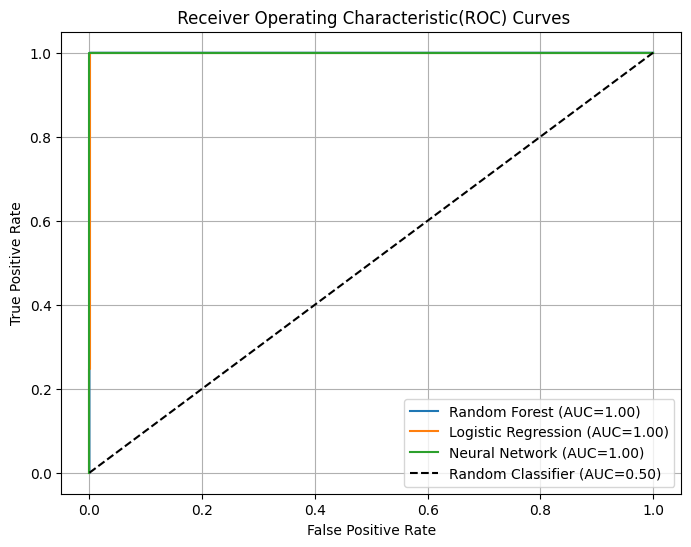

In [42]:
# Plot ROC curves for all models
plt.figure(figsize=(8,6))
plt.plot(rf_fpr,rf_tpr,label=f'Random Forest (AUC={rf_auc:.2f})')
plt.plot(lr_fpr,lr_tpr,label=f'Logistic Regression (AUC={lr_auc:.2f})')
plt.plot(nn_fpr,nn_tpr,label=f'Neural Network (AUC={nn_auc:.2f})')

#Plot ROC curve for random classifier (50% area)
plt.plot([0,1],[0,1],linestyle='--',color='black',label='Random Classifier (AUC=0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver Operating Characteristic(ROC) Curves')
plt.legend()
plt.grid()
plt.show()

SAVING MODELS (by importing joblib)

In [43]:
# Save the trained models and scaler at the VERY END
import joblib
import os


In [45]:

# Get the path to the backend folder (one level up from training, then into backend)
gui_folder = os.path.join(os.path.dirname(os.getcwd()), 'backend')

# Save models to the GUI folder
joblib.dump(rf_model, os.path.join(gui_folder, 'rf_model.joblib'))
joblib.dump(lr_model, os.path.join(gui_folder, 'lr_model.joblib'))
joblib.dump(nn_model, os.path.join(gui_folder, 'nn_model.joblib'))
joblib.dump(scaler, os.path.join(gui_folder, 'scaler.joblib'))

print("Models and scaler saved successfully to GUI folder!")

Models and scaler saved successfully to GUI folder!


In [ ]:
# joblib.dump(rf_model, 'rf_model.joblib')
# joblib.dump(lr_model, 'lr_model.joblib')
# joblib.dump(nn_model, 'nn_model.joblib')
# joblib.dump(scaler, 'scaler.joblib')


# print("Models and scaler saved successfully!")

Models and scaler saved successfully!


to find exact column names

In [46]:
print(df.columns.tolist()) 

['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count

In [47]:
import json


# Save feature names
# Save feature names to JSON file (CRITICAL for your Flask app)
with open(os.path.join(gui_folder, 'feature_names.json'), 'w') as f:
    json.dump(X_train.columns.tolist(), f)
    
    

print(f"Models, scaler, and feature names saved successfully to: {gui_folder}")    

Models, scaler, and feature names saved successfully to: c:\Users\Ehtisham\OneDrive\Desktop\python\DDOS CLASSIFIER\backend


In [ ]:
# # Add this to your training code
# import pickle
# with open('ddos_model.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

In [52]:
df.sample(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
42072,54552,72678952,6,9,11613,62,10135,0,1935.5,4058.890772,...,20.0,32235.0,0.0,32235.0,32235.0,35400000.0,41600000.0,64800000.0,5964033.0,BENIGN
65417,80,211001,5,0,30,0,6,6,6.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
41642,54115,72112,6,3,11601,26,5840,0,1933.5,2189.772933,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
14029,56022,118,1,1,6,6,6,6,6.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
27988,80,844041,6,0,36,0,6,6,6.0,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


In [54]:
rows_label1 = df[df['Label'] == 1]

print(rows_label1)

Empty DataFrame
Columns: [Destination Port, Flow Duration, Total Fwd Packets, Total Backward Packets, Total Length of Fwd Packets, Total Length of Bwd Packets, Fwd Packet Length Max, Fwd Packet Length Min, Fwd Packet Length Mean, Fwd Packet Length Std, Bwd Packet Length Max, Bwd Packet Length Min, Bwd Packet Length Mean, Bwd Packet Length Std, Flow Bytes/s, Flow Packets/s, Flow IAT Mean, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min, Bwd IAT Total, Bwd IAT Mean, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min, Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length, Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance, FIN Flag Count, SYN Flag Count, RST Flag Count, PSH Flag Count, ACK Flag Count, URG Flag Count, CWE Flag Count, ECE Flag Count, Down/Up Ratio, Average Packet Size, Avg Fwd Segment Size, Avg Bwd Segment 

In [56]:
df.sample(2)[df['Label'] == 1]

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_21552\3114612244.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sample(2)[df['Label'] == 1]


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [57]:
df.groupby('Label').sample(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
41032,138,28,13,0,3055,0,235,235,235.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
50540,53,179,2,2,90,122,45,45,45.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
20748,80,138433,3,6,26,11607,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
22579,80,6918820,5,0,30,0,6,6,6.000000,0.000000,...,20.0,2092.0,0.0,2092.0,2092.0,6916728.0,0.0,6916728.0,6916728.0,DDoS


Destination Port                   80
Flow Duration                  138433
Total Fwd Packets                   3
Total Backward Packets              6
Total Length of Fwd Packets        26
                                ...  
Idle Mean                         0.0
Idle Std                          0.0
Idle Max                          0.0
Idle Min                          0.0
Label                            DDoS
Name: 20748, Length: 79, dtype: object


In [63]:


pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', None)         # don’t cut columns
row = df.iloc[20748]   # 208th row (0-based index)
print(row)

Destination Port                   80
Flow Duration                  138433
Total Fwd Packets                   3
Total Backward Packets              6
Total Length of Fwd Packets        26
                                ...  
Idle Mean                         0.0
Idle Std                          0.0
Idle Max                          0.0
Idle Min                          0.0
Label                            DDoS
Name: 20748, Length: 79, dtype: object


In [65]:
pd.set_option('display.max_rows', None)   # show all 79 rows
pd.set_option('display.max_columns', None)  # show all columns

In [67]:
row_data=df.iloc[20748]
pd.DataFrame(row_data).reset_index().rename(columns={"index": "Feature", 0: "Value"})


,Feature,20748
0,Destination Port,80
1,Flow Duration,138433
2,Total Fwd Packets,3
3,Total Backward Packets,6
4,Total Length of Fwd Packets,26
5,Total Length of Bwd Packets,11607
6,Fwd Packet Length Max,20
7,Fwd Packet Length Min,0
8,Fwd Packet Length Mean,8.666667
9,Fwd Packet Length Std,10.263203
